<a href="https://colab.research.google.com/github/pcsilcan/aed/blob/master/week14/14_graph_nice_adjacency_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
%%writefile graph.h
#ifndef __GRAPH_H__
#define __GRAPH_H__

#include <fstream>
#include <map>
#include <queue>
#include <string>
#include <vector>

using namespace std;

typedef pair<int, float>    edge;
typedef vector<edge>        vp;
typedef vector<vp>          vvp;

/*

nodeNames:
    "felipe": 0
    "rosa"  : 1
    "jose"  : 2
    "ricky" : 3
    "vicky" : 4
    ...

G:
    0: (2, 1.0), (4, 1.0)
    1: (3, 1.0)
    2: (0, 1.0)
    3: (1, 1.0), (4, 1.0)
    4: (0, 1.0), (3, 1.0)

*/

class Graph {
    vvp                 G;
    bool                directed;
    map<string, int>    name2i;
    vector<string>      i2name;

public:
    Graph(bool directed=true) : directed(directed) {}

    void addNode(string nodeName) {
        name2i[nodeName] = G.size();
        i2name.push_back(nodeName);
        G.push_back(vp());
    }
    void addEdge(string nameU, string nameV, float w=1.0) {
        int u = name2i[nameU];
        int v = name2i[nameV];
        G[u].push_back(edge(v, w));
        if (!directed) {
            G[v].push_back(edge(u, w));
        }
    }

    map<string, string> bfs(string nameS) {
        auto s          = name2i[nameS];
        auto n          = G.size();
        vector<bool>    visited(n, false);
        vector<int>     path(n, -1);
        queue<int>      q;

        visited[s] = true;
        q.push(s);
        while (!q.empty()) {
            auto u = q.front();
            for (auto edge : G[u]) {
                auto v = edge.first;
                if (!visited[v]) {
                    visited[v] = true;
                    path[v] = u;
                    q.push(v);
                }
            }
            q.pop();
        }
        map<string, string> result;
        for (int i = 0; i < n; ++i) {
            result[i2name[i]] = path[i] == -1? "" : i2name[path[i]];
        }

        return result;
    }

    void saveDot(string fileName) {
        ofstream dot(fileName);
        string rel = directed? "->" : "--";
        
        dot << (directed? "digraph" : "strict graph") << " G {\n";
        for (auto kv : name2i) {
            dot << "    " << kv.second << "[label=\"" << kv.first << "\"];\n";
        }
        dot << endl;
        for (auto kv : name2i) {
            auto u = kv.second;
            for (auto edge : G[u]) {
                auto v = edge.first;
                auto w = edge.second;
                dot << "    " << u << rel << v << ";\n";
            }
        }
        dot << "}";
    }
};

#endif

Overwriting graph.h


In [22]:
%%writefile graphTest.cpp
#include <iostream>
#include "graph.h"

using namespace std;

int main() {
    Graph* G = new Graph(false);

    G->addNode("felipe");
    G->addNode("rosa");
    G->addNode("jose");
    G->addNode("ricky");
    G->addNode("vicky");

    G->addEdge("felipe", "jose");
    G->addEdge("felipe", "vicky");
    G->addEdge("rosa", "ricky");
    G->addEdge("ricky", "vicky");

    auto result = G->bfs("felipe");

    for (auto kv : result) {
        cout << kv.first << "\t: " << kv.second << endl;
    }

    G->saveDot("amigos.dot");

    delete G;
    return 0;
}

Overwriting graphTest.cpp


In [25]:
%%script bash
g++ -std=c++17 graphTest.cpp    \
    && ./a.out                  \
    && cat amigos.dot

felipe	: 
jose	: felipe
ricky	: vicky
rosa	: ricky
vicky	: felipe
strict graph G {
    0[label="felipe"];
    2[label="jose"];
    3[label="ricky"];
    1[label="rosa"];
    4[label="vicky"];

    0--2;
    0--4;
    2--0;
    3--1;
    3--4;
    1--3;
    4--0;
    4--3;
}

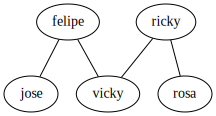

In [15]:
import graphviz
graphviz.Source.from_file("amigos.dot")